In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

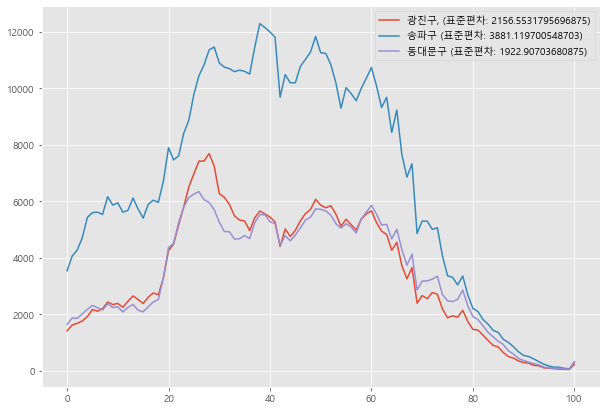

In [54]:
df = pd.read_csv('age_pop.csv', encoding='cp949')
df_np = np.array(df)
num_only = df_np[1:, 3:].copy()

for index in range(len(num_only)):
    for column in range(len(num_only[0])):
        num_only[index][column] = int(num_only[index][column].replace(',',''))

data = np.insert(num_only, 0, df_np[1:, 0], axis=1)

max_total, min_total = -np.inf, np.inf
max_index, min_index = 0, 0

for i in range(len(data)):
    if i == 4: continue
    total = 0
    for j in range(1, len(data[0])):
        total += (data[i][j] - data[4][j]) ** 2
    if total > max_total: max_total, max_index = total, i
    if total < min_total: min_total, min_index = total, i

plt.figure(figsize=(10, 7))
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.plot(data[4][1:], label=f"{data[4][0].split()[1]}, (표준편차: {np.std(data[4][1:])})")
plt.plot(data[max_index][1:], label=f"{data[max_index][0].split()[1]} (표준편차: {np.std(data[max_index][1:])})")
plt.plot(data[min_index][1:], label=f"{data[min_index][0].split()[1]} (표준편차: {np.std(data[min_index][1:])})")
plt.legend(loc='upper right')
plt.show()